In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

## Get the shapefile for one city, project it, display it, and save it

In [10]:
# from some place name, create a GeoDataFrame containing the geometry of the place
city = ox.gdf_from_place('Greater London')
city

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-0.51038 51.46809, -0.51036 51.46795...","Greater London, England, United Kingdom",51.691874,51.28676,0.334016,-0.510375


In [11]:
# save the retrieved data as a shapefile
ox.save_gdf_shapefile(city)

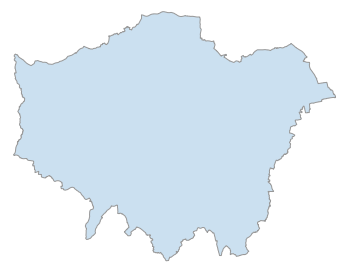

In [12]:
# project the geometry to the appropriate UTM zone (calculated automatically) then plot it
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city)

The reason why a error returns when 'London' or 'London, United Kingdom' is because the API returns a point for both of those queries.

In [13]:
G = ox.graph_from_place('Greater London', network_type='drive')
fig, ax = ox.plot_graph(G)

KeyboardInterrupt: 